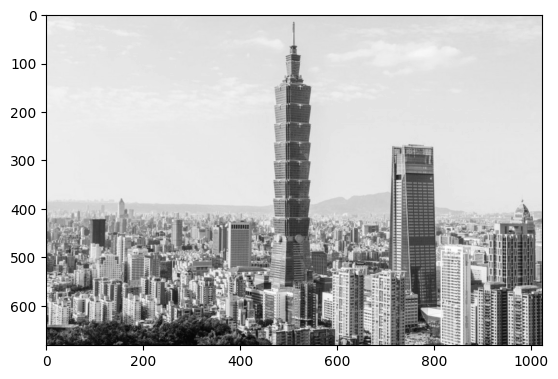

In [1]:
# Corner detection 找出邊角 -- 轉換灰階
# harris corner detector
from skimage.feature import corner_harris, corner_peaks
from skimage import color, io
import matplotlib.pyplot as plt
tp = io.imread('101.jpg')
tp101 = io.imread('101.jpg', as_gray = True)
plt.imshow(tp101, cmap = 'gray')
plt.show()

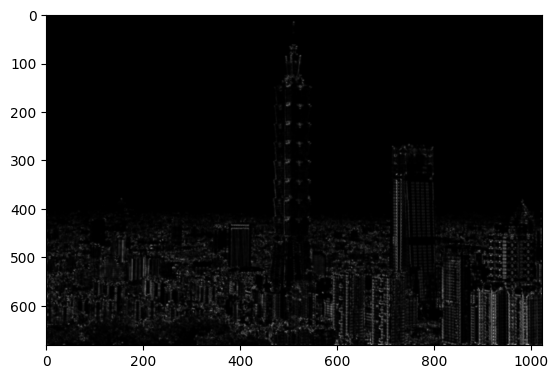

In [2]:
tp101_harris = corner_harris(tp101, method = 'eps')
plt.imshow(tp101_harris, cmap = 'gray')
plt.show()

In [3]:
corners = corner_peaks(tp101_harris, min_distance = 33,  threshold_rel = 0.1)
print(len(corners))
corners[:3]

61


array([[527, 936],
       [625, 923],
       [579, 923]], dtype=int64)

In [4]:
def show_image_with_corners(image, coords, title = 'Corners detected'):
    plt.imshow(image, interpolation = 'nearest', cmap = 'gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize = 15)
    plt.axis('off')
    plt.show()

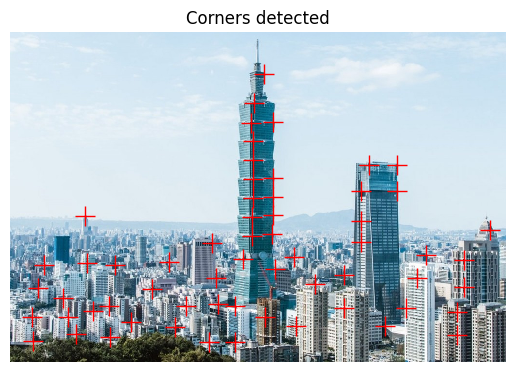

In [5]:
show_image_with_corners(tp, corners)

### Perspective

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import color

def show_image(image, title = 'Image', cmap_type = 'gray', interpolation = None):
    plt.imshow(image, cmap = cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def plot_comparision(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (32, 8), sharex = True, sharey = True)
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    
    ax2.imshow(filtered, cmap = plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

def show_image_with_corners(image, coords, title = 'Corners detected'):
    plt.imshow(image, interpolation = 'nearest', cmap = 'gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize = 15)
    plt.axis('off')
    plt.show()

building_image = plt.imread('corners_building_top.jpg')

building_image[:1]

# Import the corner_harris() function from the feature module.
# Convert the building_image to grayscale.
# Apply the harris detector to obtain the measure response image with the possible corners.
# Find the peaks of the corners.

array([[[202, 223, 244],
        [202, 223, 244],
        [202, 223, 244],
        ...,
        [197, 219, 242],
        [197, 219, 242],
        [197, 219, 242]]], dtype=uint8)

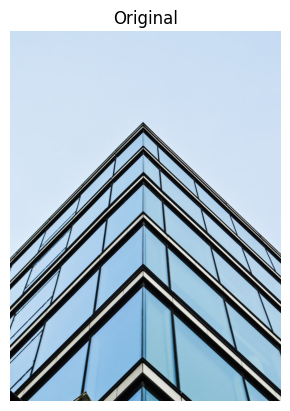

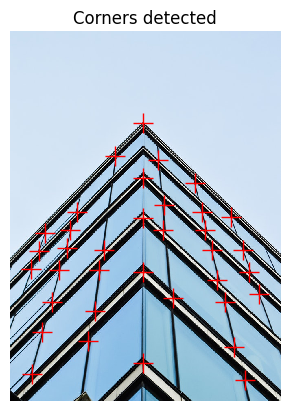

In [8]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

# Convert image from RGB-3 to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance = 40, threshold_rel = 0.1)

# Show original and resulting image with corners detected
show_image(building_image, 'Original')
show_image_with_corners(building_image, coords)

### Less corners

With a min_distance setted to 2, we detect a total 98 corners in the image.
With a min_distance setted to 40, we detect a total 36 corners in the image.


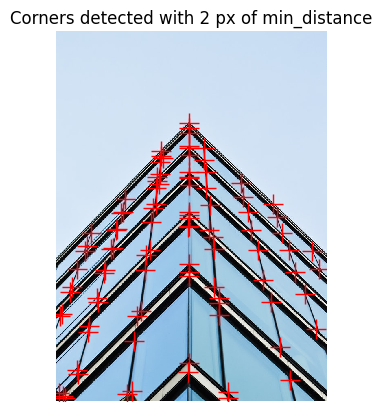

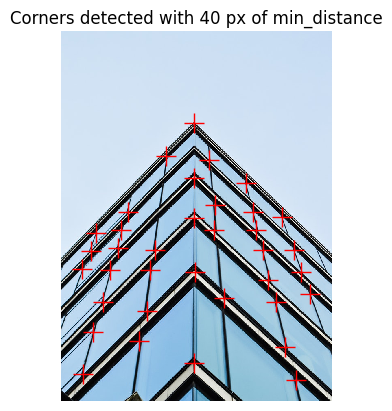

In [9]:
# Find the peaks with a min distance of 2 pixels
coords_w_min_2 = corner_peaks(measure_image, min_distance = 2, threshold_rel = 0.1)
print('With a min_distance setted to 2, we detect a total', len(coords_w_min_2), 'corners in the image.')

# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance = 40, threshold_rel = 0.1)
print('With a min_distance setted to 40, we detect a total', len(coords_w_min_40), 'corners in the image.')

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_2, 'Corners detected with 2 px of min_distance')
show_image_with_corners(building_image, coords_w_min_40, 'Corners detected with 40 px of min_distance')